# Tarea I. Perceptrón - Redes Neuronales Profundas

----------------------------

## **Universidad de Sonora**

### **Maestría en Ciencia de Datos**

----------------------------

Profesor: **Dr. Alfredo Castañeda**

----------------------------

Author: **Luis Rafael Arce Rivera**

----------------------------
Fecha: **2021-01-26**

In [26]:
#librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
%matplotlib inline

In [63]:
#utilizando dataframe de iris de scikitlearn
iris_dataset = load_iris()
iris_dataset.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']], 
                  columns= iris_dataset['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [59]:
#reduciendo la tabla solo a los elementos que utilizaré, 
#en este caso las caracteristicas de los petalos y solo dos familias de flores 'setosa', 'versicolor'
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced = df_reduced.loc[df_reduced["target"].isin([0, 1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [30]:
# valores de entrada seran X_df (caracteristicas de petalos)
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
# y_df seran los objetivos o targets
y_df = df_reduced["target"].values

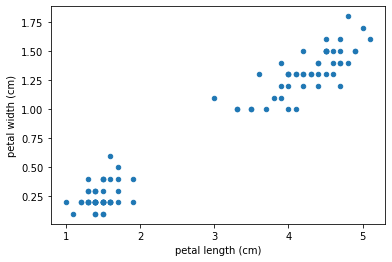

In [31]:
#graficando X_df
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [32]:
y_df #valores de los targets esperados

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
#variables iniciales

weights = np.random.uniform(0,0.5, size=(2,1)) #pesos

biases = np.random.uniform(0,0.5, size=1)# sesgos

print("Pesos", weights)
print("Sesgo", biases)

learning_rate = 0.02
observaciones = 100

Pesos [[0.41774084]
 [0.20930699]]
Sesgo [0.16764253]


In [57]:
for i in range(100):
    outputs = np.dot(X_df,weights)+ biases
    deltas = outputs - y_df
    loss = np.sum(deltas**2)/2/observaciones
    print(loss)
    deltas_scaled=deltas/observaciones
    weights = weights - learning_rate * np.dot(X_df.T,deltas_scaled)
    biases = biases -learning_rate *np.sum(deltas_scaled)

91.05635625620518
107.12057533065393
133.50129176837711
172.94200786783054
229.75523342338053
310.2446022786813
423.36917893900056
581.7145876582111
802.87300972328
1111.3814003785385
1541.4302551564545
2140.6412003384003
2975.330294802598
4137.838443193741
5756.738991684984
8011.050729439898
11150.027347007655
15520.710874587046
21606.294894300023
30079.53827252997
41877.13388741062
58303.25324747722
81173.71307440929
113016.70037539983
157352.2446450296
219081.33073686276
305027.66589241126
424691.9891782977
591302.3065389609
823276.1470119428
1146256.4814775712
1595946.3593713385
2222055.6110200603
3093795.893710815
4307531.517296541
5997431.790273205
8350302.422661441
11626235.485163588
16187360.621477734
22537875.742945217
31379782.296212446
43690486.21641562
60830842.764637105
84695588.78964767
117922791.56327385
164185467.17480874
228597604.69347182
318279479.00073093
443144743.35260195
616996308.8046509
859052151.6858021
1196069715.6028125
1665303744.5575356
2318624513.268298
3

In [56]:
print("Pesos", weights)
print("Sesgo", biases)

Pesos [[0.41774084]
 [0.20930699]]
Sesgo [0.16764253]
